# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
import matplotlib.pyplot as plt
# import libraries here; add more as necessary
import numpy as np
import pandas as pd

# magic word for producing visualizations in notebook
%matplotlib inline

pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
general_demographic_df = pd.read_csv('data/Udacity_AZDIAS_Subset.csv', delimiter=';')
# Load in the feature summary file.
feature_df = pd.read_csv('data/AZDIAS_Feature_Summary.csv', delimiter=';')



In [3]:
general_demographic_df.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [4]:
feature_df.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [5]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

print(general_demographic_df.shape)
print(feature_df.shape)




(891221, 85)
(85, 4)


In [6]:
general_demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGER_TYP               891221 non-null  int64  
 1   ALTERSKATEGORIE_GROB   891221 non-null  int64  
 2   ANREDE_KZ              891221 non-null  int64  
 3   CJT_GESAMTTYP          886367 non-null  float64
 4   FINANZ_MINIMALIST      891221 non-null  int64  
 5   FINANZ_SPARER          891221 non-null  int64  
 6   FINANZ_VORSORGER       891221 non-null  int64  
 7   FINANZ_ANLEGER         891221 non-null  int64  
 8   FINANZ_UNAUFFAELLIGER  891221 non-null  int64  
 9   FINANZ_HAUSBAUER       891221 non-null  int64  
 10  FINANZTYP              891221 non-null  int64  
 11  GEBURTSJAHR            891221 non-null  int64  
 12  GFK_URLAUBERTYP        886367 non-null  float64
 13  GREEN_AVANTGARDE       891221 non-null  int64  
 14  HEALTH_TYP             891221 non-nu

In [7]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   attribute           85 non-null     object
 1   information_level   85 non-null     object
 2   type                85 non-null     object
 3   missing_or_unknown  85 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB


In [8]:
general_demographic_df.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,886367.000000,886367.000000,886367.000000,886367.000000,886367.000000,886367.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,817722.000000,817722.000000,891221.000000,891221.000000,817722.000000,817722.000000,817722.000000,872873.000000,306609.000000,783619.000000,817722.000000,798073.000000,794213.000000,798073.000000,817252.000000,798073.000000,798073.000000,757897.000000,757897.000000,757897.000000,757897.000000,757897.000000,757897.000000,797481.000000,797481.000000,797481.000000,798066.000000,770025.000000,757897.000000,886367.000000,770025.000000,785421.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,3.790586,1101.178533,7.350304,0.196612,1.792102,14.622637,4.453621,3.599574,2.185966,4.791151,2.432575,1.026827,8.154346,3.419630,3.945860,4.272729,4.240609,4.001597,4.023709,4.359086,4.481405,4.025014,3.910139,4.763223,4.667550,4.445007,4.256076,3.661784,1.266967,0.008423,0.003483,1.197852,3.362438,10.864126,1.727637,0.004162,4.207243,3.410640,3.933406,7.908791,8.287263,0.040647,2.798641,3.018452,1993.277011,4.052836,1.494277,1.265584,0.624525,0.305927,1.389552,3.158580,4.153043,3.939172,4.549491,3.738306,2.592991,2.963540,2.698691,4.257967,619.701439,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,1.987876,976.583551,3.525723,0.397437,1.269062,12.616883,3.855639,3.926486,1.756537,3.425305,1.474315,0.586634,4.844532,1.417741,1.946564,1.915885,2.007373,1.857540,2.077746,2.022829,1.807552,1.903816,1.580306,1.830789,1.795712,1.852412,1.770137,1.707637,1.287435,0.091392,0.084957,0.952532,1.352704,7.639683,1.155849,0.068855,1.624057,1.628844,1.964701,1.923137,15.628087,0.324028,2.656713,1.550312,3.332739,1.949539,1.403961,1.245178,1.013443,0.638725,1.779483,1.329537,2.183710,1.718996,2.028919,0.923193,1.119052,1.428882,1.521524,2.030385,340.034318,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

In [9]:
feature_df.describe()

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,AGER_TYP,person,ordinal,[-1]
freq,1,43,49,26


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [10]:
print(feature_df.tail())

      attribute information_level     type missing_or_unknown
80     PLZ8_HHZ    macrocell_plz8  ordinal               [-1]
81     PLZ8_GBZ    macrocell_plz8  ordinal               [-1]
82       ARBEIT         community  ordinal             [-1,9]
83  ORTSGR_KLS9         community  ordinal             [-1,0]
84     RELAT_AB         community  ordinal             [-1,9]


In [11]:
general_demographic_df.isna().sum().sum()

4896838

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [12]:
# Identify missing or unknown data values and convert them to NaNs.

import ast  # Importing ast for safe string-to-list conversion

# Iterate through each feature in feature_df
for idx, row in feature_df.iterrows():
    # each row is a pandas series

    feature_name = row['attribute']
    missing_str = row['missing_or_unknown']

    # Safely convert the string to a list (e.g., "[-1, 9]" → [-1, 9])
    try:
        missing_or_unknown = ast.literal_eval(missing_str)
    except:
        print(f"Skipping {feature_name}: Could not parse {missing_str}")
        continue

    # Check if the feature exists in the dataset
    if feature_name in general_demographic_df.columns:
        # Replace missing/unknown values with NaN
        general_demographic_df[feature_name] = general_demographic_df[feature_name].replace(missing_or_unknown, np.nan)


general_demographic_df.isna().sum().sum()



Skipping CAMEO_DEUG_2015: Could not parse [-1,X]
Skipping CAMEO_DEU_2015: Could not parse [XX]
Skipping CAMEO_INTL_2015: Could not parse [-1,XX]


8372810

In [13]:
print(general_demographic_df.isna().sum())


AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
SEMIO_ERL                     0
SEMIO_KU

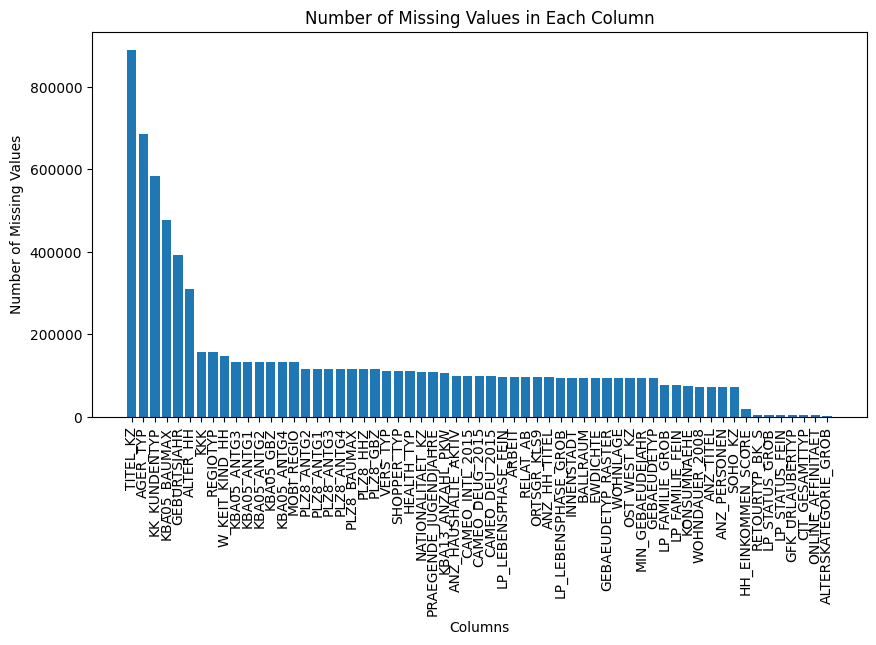

In [14]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

missing_data = general_demographic_df.isna().sum()
missing_data = missing_data[missing_data > 0]
missing_data = missing_data.sort_values(ascending=False)

plt.figure(figsize=(10,5))

plt.bar(missing_data.index, missing_data.values)
plt.xticks(rotation=90)
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()



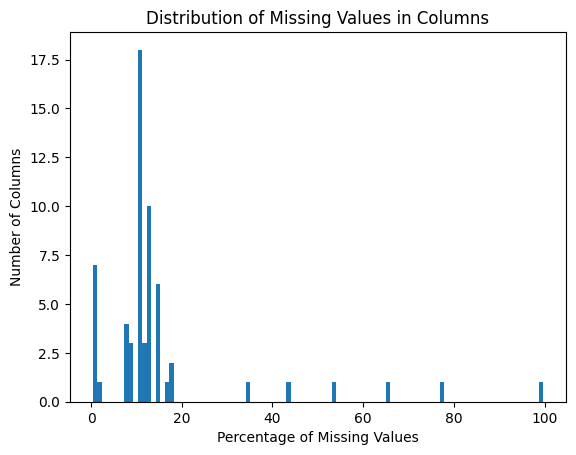

In [15]:
# Investigate patterns in the amount of missing data in each column.

missing_per_col_percentage =  missing_data / general_demographic_df.shape[0] * 100

plt.hist(missing_per_col_percentage, bins=100)
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Number of Columns')
plt.title('Distribution of Missing Values in Columns')
plt.show()


In [16]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
# drop the  columsn where missing percentage > 20
outlier_columns = missing_per_col_percentage[missing_per_col_percentage > 20].index.tolist() #
print('Columns to be removed that has >20% missing data:', outlier_columns)

general_demographic_df = general_demographic_df.drop(outlier_columns, axis=1) # axis=1 for columns
general_demographic_df.shape




Columns to be removed that has >20% missing data: ['TITEL_KZ', 'AGER_TYP', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', 'ALTER_HH']


(891221, 79)

In [17]:
out_lier_cols = missing_per_col_percentage[missing_per_col_percentage > 20].index.tolist()
print(out_lier_cols)
general_demographic_df.shape


['TITEL_KZ', 'AGER_TYP', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', 'ALTER_HH']


(891221, 79)

#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)

* Columns removed: ['TITEL_KZ', 'AGER_TYP', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR', 'ALTER_HH']
* The distribution of missing values in columns is right-skewed, with most columns having less than 20% missing values.


#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [18]:
# How much data is missing in each row of the dataset?
#
missing_per_row = general_demographic_df.isna().sum(axis=1) # axis=1 for rows
missing_per_row.name = 'Missing values'
missing_per_row.describe()



count    891221.000000
mean          5.648638
std          13.234726
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          49.000000
Name: Missing values, dtype: float64

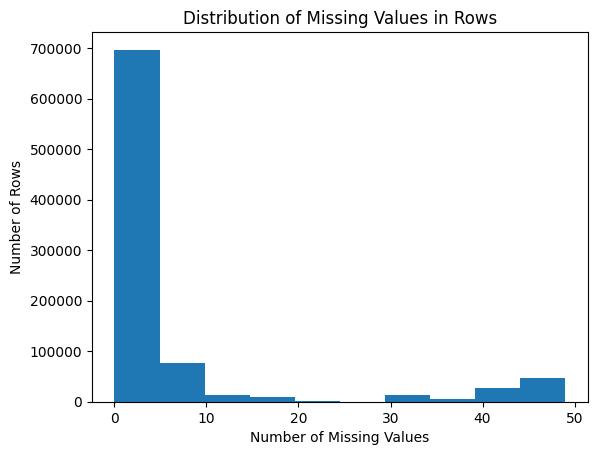

In [19]:
plt.hist(missing_per_row)
plt.xlabel('Number of Missing Values')
plt.ylabel('Number of Rows')
plt.title('Distribution of Missing Values in Rows')
plt.show()

In [20]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

# from the plot we can use 25 as a threshold

threshold = 25
lower_subset_df = general_demographic_df[missing_per_row <= threshold]
upper_subset_df = general_demographic_df[missing_per_row > threshold]

print('Number of rows in lower subset:', lower_subset_df.shape[0])
print('Number of rows in upper subset:', upper_subset_df.shape[0])




Number of rows in lower subset: 797962
Number of rows in upper subset: 93259


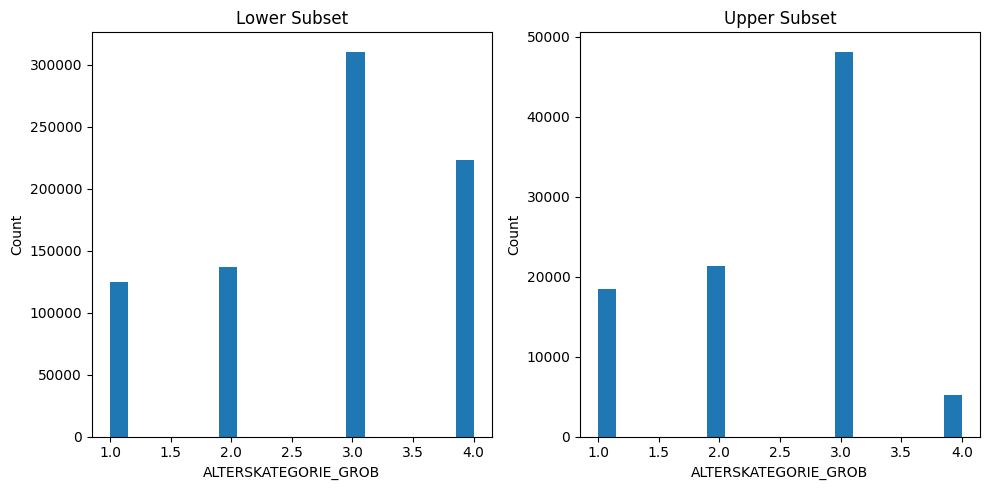

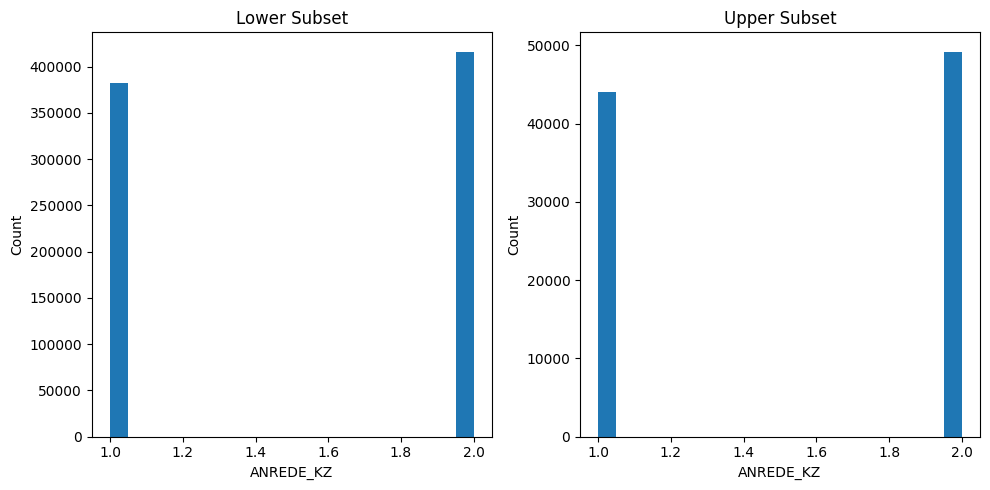

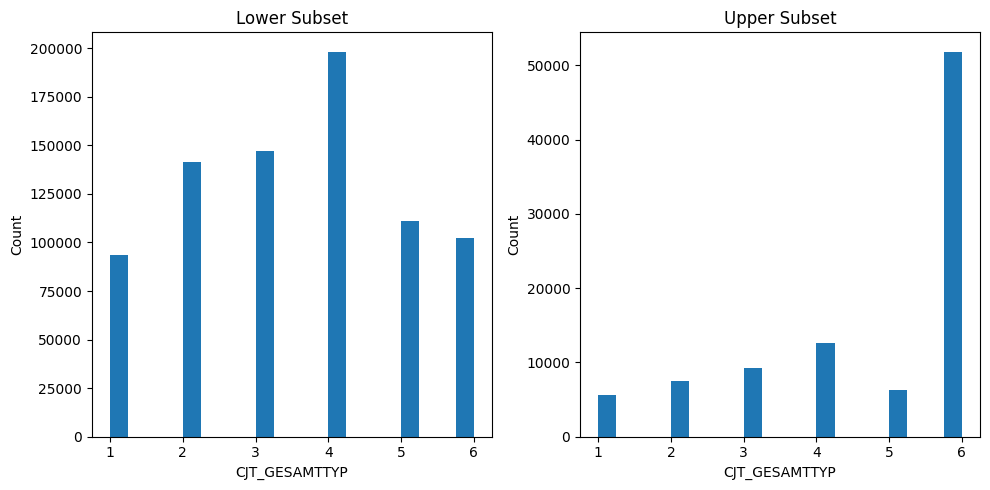

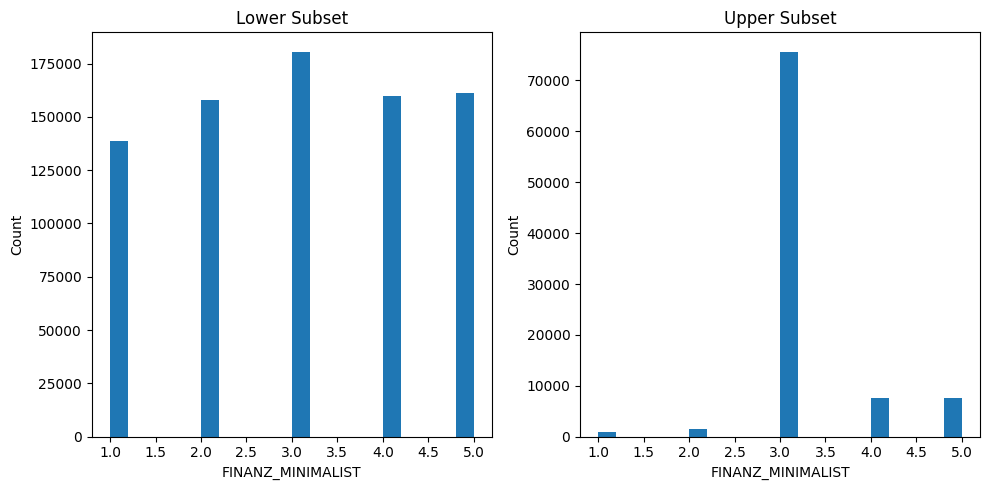

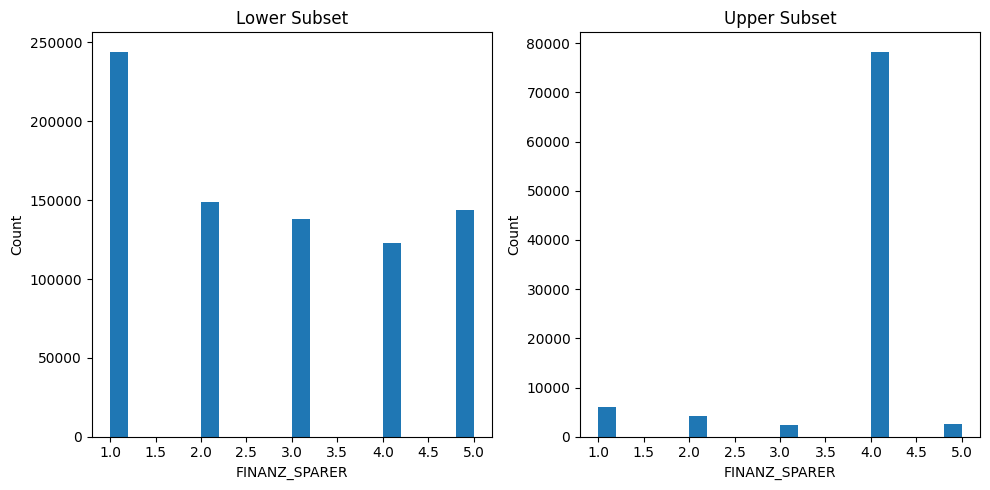

In [21]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

def compare_distributions(col_name):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Lower subset
    ax[0].hist(lower_subset_df[col_name].dropna(), bins=20)
    ax[0].set_title('Lower Subset')
    ax[0].set_xlabel(col_name)
    ax[0].set_ylabel('Count')

    # Upper subset
    ax[1].hist(upper_subset_df[col_name].dropna(), bins=20)
    ax[1].set_title('Upper Subset')
    ax[1].set_xlabel(col_name)
    ax[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

first_5_cols = lower_subset_df.columns[:5]
for col in first_5_cols:
    compare_distributions(col)


#### Discussion 1.1.3: Assess Missing Data in Each Row

(Double-click this cell and replace this text with your own text, reporting your observations regarding missing data in rows. Are the data with lots of missing values are qualitatively different from data with few or no missing values?)
* The distribution of missing values in rows is right-skewed, with most rows having more than 25 missing values.
* and normally distributed for the rows with less than 25 missing values.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [22]:
feature_df['type'].value_counts()

type
ordinal        49
categorical    21
numeric         7
mixed           7
interval        1
Name: count, dtype: int64

In [23]:
# How many features are there of each data type?
general_demographic_df.info()

# count the number of features of each data type
# feature_df['type'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 79 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ALTERSKATEGORIE_GROB   888340 non-null  float64
 1   ANREDE_KZ              891221 non-null  int64  
 2   CJT_GESAMTTYP          886367 non-null  float64
 3   FINANZ_MINIMALIST      891221 non-null  int64  
 4   FINANZ_SPARER          891221 non-null  int64  
 5   FINANZ_VORSORGER       891221 non-null  int64  
 6   FINANZ_ANLEGER         891221 non-null  int64  
 7   FINANZ_UNAUFFAELLIGER  891221 non-null  int64  
 8   FINANZ_HAUSBAUER       891221 non-null  int64  
 9   FINANZTYP              891221 non-null  int64  
 10  GFK_URLAUBERTYP        886367 non-null  float64
 11  GREEN_AVANTGARDE       891221 non-null  int64  
 12  HEALTH_TYP             780025 non-null  float64
 13  LP_LEBENSPHASE_FEIN    793589 non-null  float64
 14  LP_LEBENSPHASE_GROB    796649 non-nu

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [24]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

categorical_features = feature_df[feature_df['type'] == 'categorical']['attribute']
binary_features = []
multi_level_categorical_features = []

for feature in categorical_features:
     if feature in general_demographic_df.columns:
        unique_values = general_demographic_df[feature].dropna().unique()
        if len(unique_values) == 2:
            binary_features.append(feature)
        elif len(unique_values) > 2:
            multi_level_categorical_features.append(feature)


print('Binary features:', binary_features)
print('Multi-level categorical features:', multi_level_categorical_features)


Binary features: ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']
Multi-level categorical features: ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


In [25]:
# Re-encode categorical variable(s) to be kept in the analysis.

#drop the catergorical features
cleaned_general_demographic_df = general_demographic_df.drop(multi_level_categorical_features, axis=1)
del general_demographic_df # deleted to free up memory ( my laptop was dying)

cleaned_general_demographic_df.shape


(891221, 66)

In [26]:
# Convert binary features to numeric 0 and 1
for feature in binary_features:
    unique_values = sorted(cleaned_general_demographic_df[feature].dropna().unique())
    if len(unique_values) == 2:
        cleaned_general_demographic_df[feature] = cleaned_general_demographic_df[feature].replace({unique_values[0]: 0, unique_values[1]: 1})

# Display the first few rows to check the changes
print(cleaned_general_demographic_df[binary_features].head())

   ANREDE_KZ  GREEN_AVANTGARDE  SOHO_KZ  VERS_TYP  OST_WEST_KZ
0          0                 0      NaN       NaN          NaN
1          1                 0      1.0       1.0          1.0
2          1                 1      0.0       0.0          1.0
3          1                 0      0.0       0.0          1.0
4          0                 0      0.0       1.0          1.0


/tmp/ipykernel_1971462/3188928579.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned_general_demographic_df[feature] = cleaned_general_demographic_df[feature].replace({unique_values[0]: 0, unique_values[1]: 1})


#### Discussion 1.2.1: Re-Encode Categorical Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

* I dropped the multi-level categorical features from the dataset.
* I kept the binary features as they are.
* I re-encoded the non-numeric binary feature as numbers.
* engineering steps took were to drop the multi-level categorical features from the dataset.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [27]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

cleaned_general_demographic_df['PRAEGENDE_JUGENDJAHRE'].head()

decade_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}
movement_dict = {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0}

cleaned_general_demographic_df['DECADE'] = cleaned_general_demographic_df['PRAEGENDE_JUGENDJAHRE'].map(decade_dict)
cleaned_general_demographic_df['MOVEMENT'] = cleaned_general_demographic_df['PRAEGENDE_JUGENDJAHRE'].map(movement_dict)


cleaned_general_demographic_df['DECADE'].head()
cleaned_general_demographic_df['MOVEMENT'].head()


0    NaN
1    1.0
2    0.0
3    1.0
4    1.0
Name: MOVEMENT, dtype: float64

In [28]:
cleaned_general_demographic_df['CAMEO_INTL_2015'].describe()

count     792242
unique        22
top           51
freq      133694
Name: CAMEO_INTL_2015, dtype: object

In [29]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

cleaned_general_demographic_df['CAMEO_INTL_2015'].head()

wealth_dict = {'11':1, '12':1, '13':1, '14':1, '15':1, '21':2, '22':2, '23':2, '24':2, '25':2,
               '31':3, '32':3, '33':3, '34':3, '35':3, '41':4, '42':4, '43':4, '44':4, '45':4,
               '51':5, '52':5, '53':5, '54':5, '55':5}

life_stage_dict = {'11':1, '12':2, '13':3, '14':4, '15':5, '21':1, '22':2, '23':3, '24':4, '25':5,
                   '31':1, '32':2, '33':3, '34':4, '35':5, '41':1, '42':2, '43':3, '44':4, '45':5,
                   '51':1, '52':2, '53':3, '54':4, '55':5}

#
# cleaned_general_demographic_df['WEALTH'] = cleaned_general_demographic_df['CAMEO_INTL_2015'].dropna() // 10
# cleaned_general_demographic_df['LIFE_STAGE'] = cleaned_general_demographic_df['CAMEO_INTL_2015'].dropna() % 10

cleaned_general_demographic_df['WEALTH'] = cleaned_general_demographic_df['CAMEO_INTL_2015'].map(wealth_dict)
cleaned_general_demographic_df['LIFE_STAGE'] = cleaned_general_demographic_df['CAMEO_INTL_2015'].map(life_stage_dict)



cleaned_general_demographic_df['WEALTH'].head()




0    NaN
1    5.0
2    2.0
3    1.0
4    4.0
Name: WEALTH, dtype: float64

In [30]:
cleaned_general_demographic_df['LIFE_STAGE'].head()

0    NaN
1    1.0
2    4.0
3    2.0
4    3.0
Name: LIFE_STAGE, dtype: float64

In [31]:
# Drop the mixed-type features from the dataset

# Identify mixed features in cleaned_df
mixed_features = feature_df[feature_df['type'] == 'mixed']['attribute']

# Filter mixed features that are present in cleaned_df
mixed_features_in_cleaned_df = [feature for feature in mixed_features if feature in cleaned_general_demographic_df.columns]

print('Mixed features in cleaned_df:', mixed_features_in_cleaned_df)

cleaned_general_demographic_df = cleaned_general_demographic_df.drop(mixed_features_in_cleaned_df, axis=1)
print(cleaned_general_demographic_df.shape)


Mixed features in cleaned_df: ['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PRAEGENDE_JUGENDJAHRE', 'WOHNLAGE', 'CAMEO_INTL_2015', 'PLZ8_BAUMAX']
(891221, 64)


#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

I kept the 2 features PRAEGENDE_JUGENDJAHRE, and CAMEO_INTL_2015 and engineered two new features for each of them. I dropped the mixed-type features from the dataset.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [32]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

cleaned_general_demographic_df.describe()



,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
count,888340.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,780025.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,817722.000000,780025.000000,817722.000000,817722.000000,872873.000000,743233.000000,817722.000000,791610.000000,794213.000000,817252.000000,798073.000000,798073.000000,757897.000000,757897.000000,757897.000000,757897.000000,757897.000000,797481.000000,797481.000000,797481.000000,798066.000000,733157.000000,757897.000000,886367.000000,733157.000000,785421.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,793846.000000,793947.000000,793846.000000,783057.000000,783057.00000,791869.000000,791869.000000
mean,2.757217,0.522098,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,0.196612,2.190129,3.419630,3.945860,4.272729,4.240609,4.001597,4.023709,4.359086,4.481405,4.025014,3.910139,4.763223,4.667550,4.445007,4.256076,3.661784,0.008423,0.511166,1.727637,0.004162,4.207243,4.147141,7.908791,8.354924,0.040647,3.018452,1993.277011,0.788810,1.494277,1.265584,0.624525,0.305927,3.158580,4.153043,3.939172,4.549491,3.738306,2.723384,2.963540,2.698691,4.472086,619.701439,2.253330,2.801858,1.595426,0.699166,3.612821,3.381087,3.166686,5.293389,3.071033,4.332805,0.77623,3.262098,2.873033
std,1.009951,0.499512,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,0.397437,0.755213,1.417741,1.946564,1.915885,2.007373,1.857540,2.077746,2.022829,1.807552,1.903816,1.580306,1.830789,1.795712,1.852412,1.770137,1.707637,0.091392,0.499876,1.155849,0.068855,1.624057,1.784211,1.923137,15.673731,0.324028,1.550312,3.332739,0.408153,1.403961,1.245178,1.013443,0.638725,1.329537,2.183710,1.718996,2.028919,0.923193,0.979867,1.428882,1.521524,1.836357,340.034318,0.972008,0.920309,0.986736,0.727137,0.973967,1.111598,0.999072,2.303379,1.360532,1.459284,0.41677,1.464494,1.484771
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000
25%,2.000000,0.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,8.000000,2.000000,0.000000,2.000000,1992.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,1.000000,3.000000,384.000000,1.000000,2.000000,1.000000,0.000000,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,1.00000,2.0

In [33]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

cleaned_general_demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 64 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ALTERSKATEGORIE_GROB   888340 non-null  float64
 1   ANREDE_KZ              891221 non-null  int64  
 2   FINANZ_MINIMALIST      891221 non-null  int64  
 3   FINANZ_SPARER          891221 non-null  int64  
 4   FINANZ_VORSORGER       891221 non-null  int64  
 5   FINANZ_ANLEGER         891221 non-null  int64  
 6   FINANZ_UNAUFFAELLIGER  891221 non-null  int64  
 7   FINANZ_HAUSBAUER       891221 non-null  int64  
 8   GREEN_AVANTGARDE       891221 non-null  int64  
 9   HEALTH_TYP             780025 non-null  float64
 10  RETOURTYP_BK_S         886367 non-null  float64
 11  SEMIO_SOZ              891221 non-null  int64  
 12  SEMIO_FAM              891221 non-null  int64  
 13  SEMIO_REL              891221 non-null  int64  
 14  SEMIO_MAT              891221 non-nu

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [56]:
import ast
import numpy as np

def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data

    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """

    # Convert missing value codes into NaNs
    for idx, row in feature_df.iterrows():
        feature_name = row['attribute']
        missing_str = row['missing_or_unknown']

        # Safely convert the string to a list (e.g., "[-1, 9]" → [-1, 9])
        try:
            missing_or_unknown = ast.literal_eval(missing_str)
        except:
            print(f"Skipping {feature_name}: Could not parse {missing_str}")
            continue

        # Check if the feature exists in the dataset
        if feature_name in df.columns:
            # Replace missing/unknown values with NaN
            df[feature_name] = df[feature_name].replace(missing_or_unknown, np.nan)

    # Remove columns with more than 20% missing data
    columns_miss_20 = ['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX']
    df_clean = df.drop(columns_miss_20, axis=1)

    # Re-encode binary categorical features
    binary_features = []
    multi_level_categorical_features = []

    for feature in feature_df[feature_df['type'] == 'categorical']['attribute']:
        if feature in df_clean.columns:
            unique_values = df_clean[feature].dropna().unique()
            if len(unique_values) == 2:
                binary_features.append(feature)
            elif len(unique_values) > 2:
                multi_level_categorical_features.append(feature)
    df_clean = df_clean.drop(multi_level_categorical_features, axis=1)

    for feature in binary_features:
        unique_values = sorted(df_clean[feature].dropna().unique())
        if len(unique_values) == 2:
            df_clean[feature] = df_clean[feature].replace({unique_values[0]: 0, unique_values[1]: 1})

    # Engineer mixed-type features
    decade_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}
    movement_dict = {1:1, 2:0, 3:1, 4:0, 5:1, 6:0, 7:0, 8:1, 9:0, 10:1, 11:0, 12:1, 13:0, 14:1, 15:0}
    df_clean['DECADE'] = df_clean['PRAEGENDE_JUGENDJAHRE'].map(decade_dict)
    df_clean['MOVEMENT'] = df_clean['PRAEGENDE_JUGENDJAHRE'].map(movement_dict)

    wealth_dict = {'11':1, '12':1, '13':1, '14':1, '15':1, '21':2, '22':2, '23':2, '24':2, '25':2,
                   '31':3, '32':3, '33':3, '34':3, '35':3, '41':4, '42':4, '43':4, '44':4, '45':4,
                   '51':5, '52':5, '53':5, '54':5, '55':5}
    life_stage_dict = {'11':1, '12':2, '13':3, '14':4, '15':5, '21':1, '22':2, '23':3, '24':4, '25':5,
                       '31':1, '32':2, '33':3, '34':4, '35':5, '41':1, '42':2, '43':3, '44':4, '45':5,
                       '51':1, '52':2, '53':3, '54':4, '55':5}
    df_clean['WEALTH'] = df_clean['CAMEO_INTL_2015'].map(wealth_dict)
    df_clean['LIFE_STAGE'] = df_clean['CAMEO_INTL_2015'].map(life_stage_dict)

    # Drop original mixed-type features
    mixed_features = feature_df[feature_df['type'] == 'mixed']['attribute']
    mixed_features_in_cleaned_df = [feature for feature in mixed_features if feature in df_clean.columns]
    df_clean = df_clean.drop(mixed_features_in_cleaned_df, axis=1)

    print(f"[CLEAN] {df_clean.shape[1]} columns left after cleaning")

    imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
    df_imputed_np_array = imp_median.fit_transform(df_clean)

    df_clean = pd.DataFrame(df_imputed_np_array, columns=df_clean.columns)


    return df_clean

from sklearn.preprocessing import Imputer
## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [35]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
from sklearn.impute import SimpleImputer

df_clean = cleaned_general_demographic_df

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

df_clean = imp_median.fit_transform(df_clean)

df_clean = pd.DataFrame(df_clean, columns=cleaned_general_demographic_df.columns)
del cleaned_general_demographic_df

df_clean.describe()


,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
count,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.00000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000
mean,2.758002,0.522098,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,0.196612,2.166407,3.417344,3.945860,4.272729,4.240609,4.001597,4.023709,4.359086,4.481405,4.025014,3.910139,4.763223,4.667550,4.445007,4.256076,3.661784,0.007729,0.572157,1.667629,0.003818,4.223564,4.122708,7.998783,7.868177,0.036222,3.016921,1993.143541,0.810883,1.420335,1.225853,0.531098,0.260161,3.134857,4.242127,3.945570,4.596877,3.765660,2.772444,2.968994,2.700332,4.565715,611.308221,2.22021,2.827762,1.648318,0.738496,3.663439,3.331265,3.148474,5.261366,3.063272,4.292413,0.803388,3.344358,2.887187
std,1.008411,0.499512,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,0.397437,0.709319,1.414212,1.946564,1.915885,2.007373,1.857540,2.077746,2.022829,1.807552,1.903816,1.580306,1.830789,1.795712,1.852412,1.770137,1.707637,0.087573,0.494766,1.125110,0.065965,1.611190,1.630276,1.866426,14.835457,0.306147,1.484591,3.177875,0.391602,1.306643,1.152170,0.960749,0.599037,1.227367,2.081955,1.626188,1.924223,0.877274,0.894995,1.317741,1.517537,1.677732,320.031613,0.91026,0.860640,0.930031,0.685484,0.917403,1.044322,0.944347,2.175968,1.284248,1.372178,0.397437,1.399851,1.400136
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,8.000000,2.000000,0.000000,2.000000,1992.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,406.000000,2.00000,2.000000,1.000000,0.000000,3.000000,3.000000,3.000000,4.000000,2.000000,4.000000,1.000000,2.0

In [36]:
df_clean.isna().sum().sum()

0

In [37]:
# Apply feature scaling to the general population demographics data.

# import StandardScaler
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
df_clean_scaled = scalar.fit_transform(df_clean)

# Convert the scaled data back to a DataFrame
df_clean_scaled = pd.DataFrame(df_clean_scaled, columns=df_clean.columns)
df_clean_scaled.describe()


,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
count,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05,8.912210e+05
mean,2.500235e-17,1.004638e-16,3.507983e-18,9.879756e-17,5.941247e-17,-3.310260e-17,3.897050e-17,1.505562e-16,9.583171e-18,-5.471656e-17,2.834291e-17,5.954004e-17,-7.468815e-17,-2.047386e-17,1.396815e-16,2.174312e-16,6.710612e-17,2.315269e-16,1.355038e-16,-8.310730e-17,-1.966384e-16,-6.996831e-17,1.034696e-16,-2.749940e-16,6.036920e-17,-1.648752e-17,-6.228264e-17,-4.003884e-17,-4.911176e-18,1.034217e-16,-1.887614e-16,1.815860e-16,2.579962e-17,3.635546e-17,-7.568473e-17,9.945546e-15,-3.138050e-17,2.916409e-17,-5.899789e-19,-4.261402e-17,-4.011857e-17,-1.112668e-16,1.243899e-16,-9.644561e-17,-1.990262e-16,1.944539e-16,1.341325e-16,-1.170391e-17,-2.990555e-17,3.284748e-17,1.368432e-16,9.611873e-17,2.324836e-16,8.868819e-17,-8.358567e-17,9.532146e-17,1.080140e-16,-6.572684e-17,5.084582e-17,1.161940e-16,2.686796e-16,-1.131962e-16,5.176667e-17,-1.251712e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.743339e+00,-1.045218e+00,-1.570358e+00,-1.243244e+00,-1.816084e+00,-1.329319e+00,-1.260597e+00,-1.533438e+00,-4.947009e-01,-1.644405e+00,-1.709323e+00,-1.513365e+00,-1.708208e+00,-1.614355e+00,-1.615900e+00,-1.455284e+00,-1.660589e+00,-1.926034e+00,-1.588922e+00,-1.841505e+00,-2.055520e+00,-2.042395e+00,-1.859742e+00,-1.839450e+00,-1.558754e+00,-8.825486e-02,-1.156419e+00,-1.482193e+00,-5.788486e-02,-2.000736e+00,-1.915448e+00,-3.749833e+00,-4.629572e-01,-1.183163e-01,-1.358570e+00,-2.562576e+00,-2.070684e+00,-1.087011e+00,-1.063952e+00,-5.527962e-01,-4.342993e-01,-1.739380e+00,-1.557253e+00,-1.811335e+00,-1.869263e+00,-3.152563e+00,-1.980396e+00,-1.494221e+00,-1.77

In [38]:
df_clean_scaled.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,VERS_TYP,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,MOVEMENT,WEALTH,LIFE_STAGE
0,-0.751680,-1.045218,-0.056416,0.804890,-0.303378,1.285741,1.429871,-0.055511,-0.494701,-0.234601,1.119108,-0.999639,0.901553,1.374629,0.537487,-1.455284,0.316841,-0.819565,-0.538400,0.056863,1.221756,0.742018,0.839442,0.420264,-0.387544,-0.088255,0.864739,-0.593390,-0.057885,-1.380077,-0.075268,0.536436,-0.260739,-0.118316,-0.011397,-0.359845,0.482932,-0.321691,-0.196024,-0.552796,-0.434299,-0.109875,0.364020,0.033471,0.209499,0.267123,0.254254,0.023530,-1.120456,0.258853,-0.194694,-0.241920,0.200128,0.378140,0.381488,0.366863,-0.317206,-0.157224,-0.120115,-0.049267,-0.213102,0.494701,0.468366,0.080573
1,-1.743339,0.956738,-1.570358,1.487601,-1.059731,1.285741,0.757254,1.422415,-0.494701,1.175204,-1.709323,0.541539,-0.142352,-0.119863,-0.539206,-1.455284,-1.166231,-1.372799,-0.538400,1.322441,-0.416882,1.298900,-0.240231,1.550121,1.369271,11.330820,0.864739,0.295412,-0.057885,1.102562,-0.688662,0.536436,0.211104,-0.118316,-1.358570,-0.359845,0.482932,-1.087011,-1.063952,-0.552796,2.904396,-1.739380,0.844338,-0.581464,1.768571,-0.872772,-0.863071,-1.494221,0.197470,-0.933234,1.098929,-0.241920,0.200128,0.378140,0.381488,1.456896,0.640354,-0.157224,-0.120115,0.729399,1.244436,0.494701,1.182728,-1.347861
2,0.239980,0.956738,-1.570358,0.804890,-1.816084,-0.675554,0.084637,1.422415,2.021423,1.175204,-0.295107,0.027813,-1.708208,-0.618027,-0.539206,-0.011411,-0.177517,0.840140,-0.538400,0.056863,1.221756,1.298900,1.379279,-0.709593,-0.387544,-0.088255,-1.156419,-0.593390,-0.057885,-0.138757,-0.688662,0.536436,0.143698,-0.118316,1.335775,-0.359845,0.482932,-0.321691,1.539832,0.488058,-0.434299,-0.109875,-1.076934,0.033471,-0.310191,0.267123,-0.863071,0.023530,-0.461493,-1.529277,0.314631,0.856668,0.200128,-0.697094,-1.077335,0.366863,0.640354,-0.157224,-0.120115,-0.827934,1.244436,-2.021423,-0.960358,0.794789
3,1.231640,0.956738,0.700556,-0.560532,1.209329,-0.675554,-1.260597,-0.794475,-0.494701,-0.234601,-1.002215,0.541539,-1.708208,-1.116191,-1.615900,-0.011411,-0.177517,1.393374,-0.013139,-0.575926,-0.416882,-0.371747,0.299605,-0.144664,0.198061,-0.088255,-1.156419,-1.482193,-0.057885,-2.000736,-0.075268,0.536436,-0.462957,-0.118316,0.662189,1.213535,0.482932,1.974271,-0.196024,-0.552796,-0.434299,0.704878,-0.116298,-1.196400,0.729190,0.267123,0.254254,0.782405,-1.120456,0.258853,-0.047833,-0.241920,-0.961799,0.378140,-1.077335,-0.723171,0.640354,-1.216157,-1.039247,-0.049267,-0.213102,0.494701,-1.674720,-0.633644
4,0.239980,-1.045218,0.700556,0.122179,0.452976,-1.329319,0.084637,-0.794475,-0.494701,1.175204,1.119108,1.055265,-0.142352,-0.119863,-1.077553,1.432462,-0.177517,-0.266330,1.037383,-1.208715,-0.963095,-1.485512,-1.319905,-0.144664,-0.973149,-0.088255,0.864739,2.073018,-0.057885,0.481902,-1.302055,0.536436,-0.328145,-0.118316,0.662189,-0.359845,0.482932,-0.321691,2.407760,0.488058,-0.434299,-0.109875,-1.076934,0.648406,-1.869263,1.407019,0.254254,0.023530,1.515396,0.258853,-0.550909,-0.241920,1.362055,0.378140,0.381488,-0.723171,-0.317206,0.901709,0.339451,1.508065,-0.213102,0.494701,0.468366,0.080573


### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)
for the missing values, I used the median value to fill in the missing values. I used the StandardScaler to scale the data.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [39]:
df_clean_scaled.shape

(891221, 64)

In [40]:
# Apply PCA to the data.
from sklearn.decomposition import PCA

pca = PCA()
df_clean_pca = pca.fit_transform(df_clean_scaled)



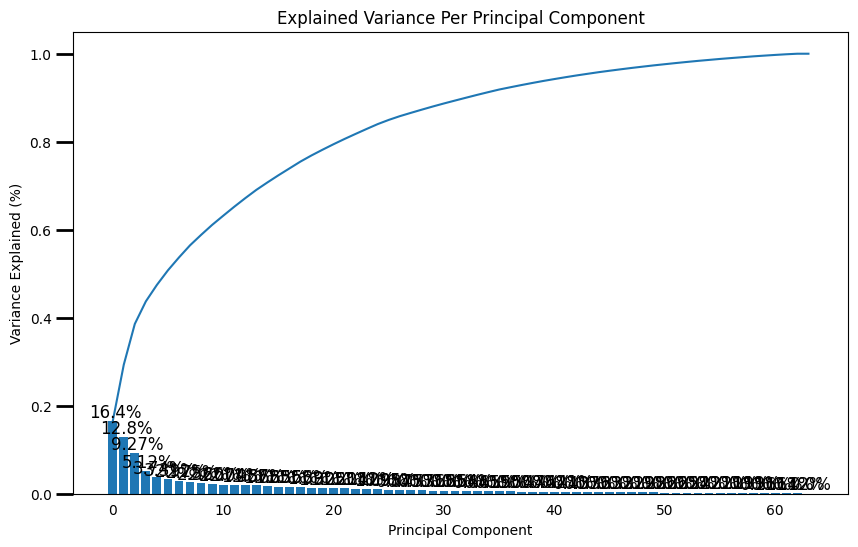

In [41]:
# Investigate the variance accounted for by each principal component.
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')


scree_plot(pca)


In [42]:
df_clean_scaled.shape

(891221, 64)

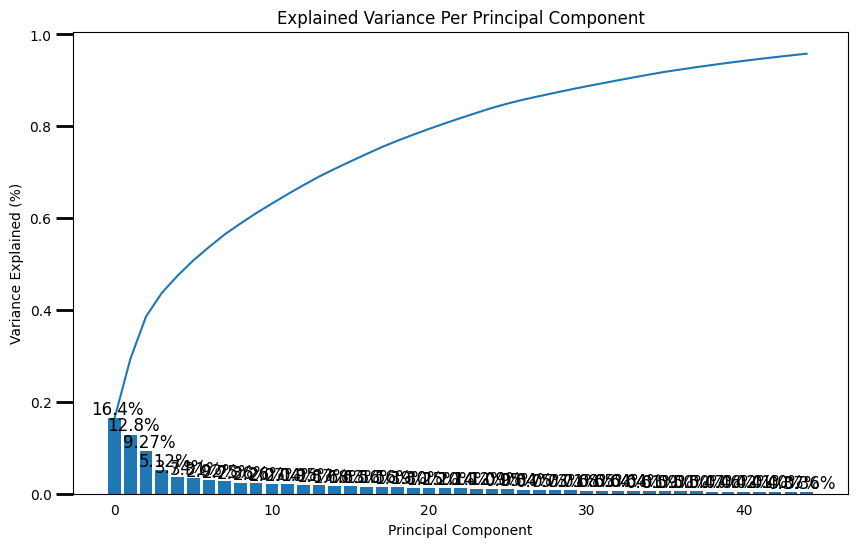

In [43]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(n_components=45)

df_clean_pca_modified = pca.fit_transform(df_clean_scaled)
scree_plot(pca)



### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)

I am retaining 45 principal components for the next step of the analysis, because at 45 principal components, the variance explained is around 90%.


### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [44]:
def pca_results(full_dataset, pca, i):
    """
    Map weights for the i-th principal component to corresponding feature names
    and print the linked values, sorted by weight.

    INPUT:
    - full_dataset: The original dataset before PCA transformation
    - pca: The fitted PCA object
    - i: The index of the principal component to investigate

    OUTPUT:
    - A DataFrame with feature names and their corresponding weights in the i-th principal component
    """
    # Get the component weights
    component_weights = pca.components_[i]

    # Create a DataFrame with feature names and their corresponding weights
    pca_df = pd.DataFrame({
        'Feature': full_dataset.columns,
        'Weight': component_weights
    })

    # Sort the DataFrame by weight
    pca_df = pca_df.sort_values(by='Weight', ascending=False)

    return pca_df

print(type(df_clean_scaled))
# Example usage:
pca_df = pca_results(df_clean_scaled, pca, 0)
print(pca_df)

<class 'pandas.core.frame.DataFrame'>
                  Feature    Weight
47             MOBI_REGIO  0.245487
51             PLZ8_ANTG1  0.231568
37            KBA05_ANTG1  0.227124
41              KBA05_GBZ  0.220468
2       FINANZ_MINIMALIST  0.217526
56               PLZ8_GBZ  0.172235
34            KONSUMNAEHE  0.170008
44             INNENSTADT  0.166436
42               BALLRAUM  0.126471
63             LIFE_STAGE  0.125243
45     GEBAEUDETYP_RASTER  0.116529
0    ALTERSKATEGORIE_GROB  0.112596
8        GREEN_AVANTGARDE  0.111850
4        FINANZ_VORSORGER  0.110206
27           ANZ_PERSONEN  0.082764
50       KBA13_ANZAHL_PKW  0.081181
17              SEMIO_ERL  0.071811
16             SEMIO_LUST  0.064385
15             SEMIO_VERT  0.052971
35       MIN_GEBAEUDEJAHR  0.051840
31         WOHNDAUER_2008  0.051736
36            OST_WEST_KZ  0.049258
48      ONLINE_AFFINITAET  0.049092
10         RETOURTYP_BK_S  0.015456
28              ANZ_TITEL  0.004300
25                SOHO_KZ 

In [45]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

# Example usage:
pca_df = pca_results(df_clean_scaled, pca, 1)
print(pca_df)


                  Feature    Weight
0    ALTERSKATEGORIE_GROB  0.268383
4        FINANZ_VORSORGER  0.247677
17              SEMIO_ERL  0.224930
16             SEMIO_LUST  0.185816
10         RETOURTYP_BK_S  0.172535
30         W_KEIT_KIND_HH  0.127488
7        FINANZ_HAUSBAUER  0.113958
58            ORTSGR_KLS9  0.092661
43               EWDICHTE  0.091506
53             PLZ8_ANTG3  0.083493
2       FINANZ_MINIMALIST  0.082461
54             PLZ8_ANTG4  0.079659
40            KBA05_ANTG4  0.077487
57                 ARBEIT  0.070415
22             SEMIO_KAEM  0.069749
20             SEMIO_KRIT  0.068883
32    ANZ_HAUSHALTE_AKTIV  0.067186
29     HH_EINKOMMEN_SCORE  0.065876
59               RELAT_AB  0.065844
62                 WEALTH  0.063486
1               ANREDE_KZ  0.060117
52             PLZ8_ANTG2  0.058727
31         WOHNDAUER_2008  0.055409
39            KBA05_ANTG3  0.053173
21              SEMIO_DOM  0.035507
33           ANZ_HH_TITEL  0.034174
26               VERS_TYP  0

In [46]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

pca_df = pca_results(df_clean_scaled, pca, 2)
print(pca_df)

                  Feature    Weight
1               ANREDE_KZ  0.357294
22             SEMIO_KAEM  0.356067
21              SEMIO_DOM  0.329513
20             SEMIO_KRIT  0.307634
19              SEMIO_RAT  0.180502
5          FINANZ_ANLEGER  0.180471
17              SEMIO_ERL  0.176977
6   FINANZ_UNAUFFAELLIGER  0.101699
3           FINANZ_SPARER  0.084681
61               MOVEMENT  0.062958
60                 DECADE  0.050760
23          SEMIO_PFLICHT  0.050398
44             INNENSTADT  0.048726
42               BALLRAUM  0.046960
7        FINANZ_HAUSBAUER  0.046081
26               VERS_TYP  0.040257
45     GEBAEUDETYP_RASTER  0.040097
36            OST_WEST_KZ  0.034204
34            KONSUMNAEHE  0.034126
51             PLZ8_ANTG1  0.033855
47             MOBI_REGIO  0.030110
56               PLZ8_GBZ  0.025058
46                    KKK  0.024863
24            SEMIO_TRADV  0.022327
41              KBA05_GBZ  0.021308
63             LIFE_STAGE  0.017304
49               REGIOTYP  0

### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

* The first principal component has a positive correlation with PLZ8_ANTG3 and PLZ8_ANTG4, and a negative correlation with MOBI_REGIO and KBA05_ANTG1. This suggests that the first principal component is related to the size of the community and the movement patterns of the population.
* The second principal component has a positive correlation with ALTERSKATEGORIE_GROB and a negative correlation with FINANZ_MINIMALIST. This suggests that the second principal component is related to the age and financial typology of the population.
* The third principal component has a positive correlation with SEMIO_VERT and a negative correlation with SEMIO_KAEM. This suggests that the third principal component is related to the personality typology of the population.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [47]:
from sklearn.cluster import KMeans
# Over a number of different cluster counts...

x=0

if x == 1:

    k_options = range(3,31,3)
    scores = []

    for k in k_options:
        k_means = KMeans(n_clusters=k)
        k_means =k_means.fit(df_clean_pca_modified)
        scores.append(np.abs(k_means.score(df_clean_pca_modified)))

        # run k-means clustering on the data and...

        # compute the average within-cluster distances.
    plt.figure(figsize=(10, 6))
    plt.plot(k_options, scores, linestyle='-', marker='o', color='b')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.title('SSE vs. K')
    plt.show()

    

In [48]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.



In [49]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

chosen_k = 18
k_means = KMeans(n_clusters=chosen_k)
k_means = k_means.fit(df_clean_pca_modified)
general_population_clusters = k_means.predict(df_clean_pca_modified)



### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)
I chose to segment the population into 18 clusters. The within-cluster distance decreases as the number of clusters increases, but the decrease in within-cluster distance becomes smaller as the number of clusters increases. I chose 18 clusters because it is was the elbow point in the graph.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [57]:
# Load in the customer demographics data.
customers = pd.read_csv('data/Udacity_CUSTOMERS_Subset.csv', delimiter=';')
customers.shape

customers_cleaned_df = clean_data(customers)
customers_cleaned_df.shape

Skipping CAMEO_DEUG_2015: Could not parse [-1,X]
Skipping CAMEO_DEU_2015: Could not parse [XX]
Skipping CAMEO_INTL_2015: Could not parse [-1,XX]


/tmp/ipykernel_1971462/1731997516.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[feature] = df_clean[feature].replace({unique_values[0]: 0, unique_values[1]: 1})


[CLEAN] 64 columns left after cleaning


(191652, 64)

In [58]:
customers_cleaned_df.isna().sum().sum()

0

In [59]:

# check if customers_cleaned_df has the same columns as df_clean, if not show difference
# Check if customers_cleaned_df has the same columns as df_clean
missing_in_customers = set(df_clean.columns) - set(customers_cleaned_df.columns)
missing_in_df_clean = set(customers_cleaned_df.columns) - set(df_clean.columns)

print("Columns in df_clean but not in customers_cleaned_df:", missing_in_customers)
print("Columns in customers_cleaned_df but not in df_clean:", missing_in_df_clean)

Columns in df_clean but not in customers_cleaned_df: set()
Columns in customers_cleaned_df but not in df_clean: set()


In [60]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
# Apply the same feature scaling using the StandardScaler object.



customers_scaled = scalar.transform(customers_cleaned_df)

# Apply PCA transformation using the PCA object.
customers_pca = pca.fit_transform(customers_scaled)

# Predict the cluster assignments using the KMeans object.
customer_clusters = k_means.predict(customers_pca)

# Display the cluster assignments
print(customer_clusters)


[17  7 11 ...  0 11 15]


### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


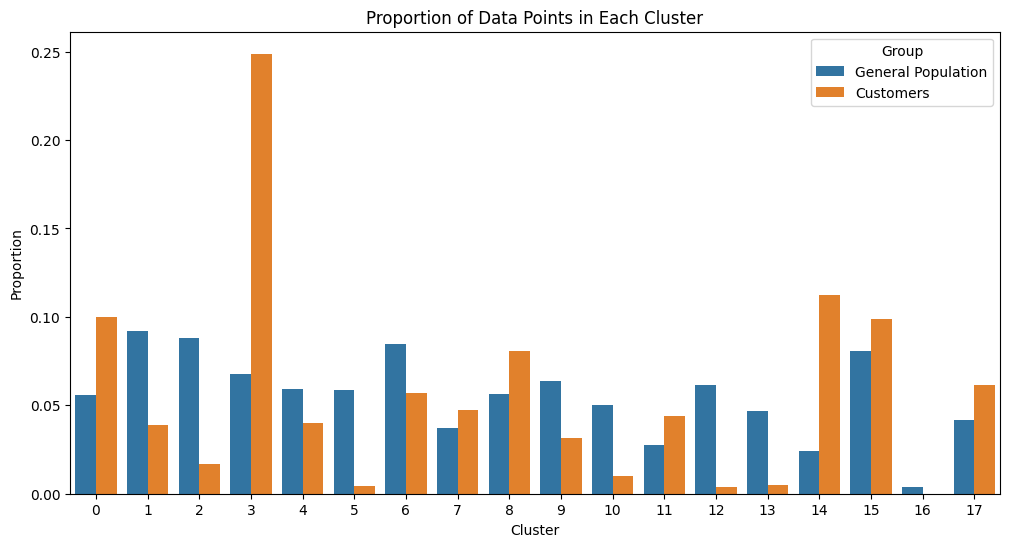

In [61]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.




import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the proportion of data points in each cluster for the general population
general_population_proportions = np.bincount(general_population_clusters) / len(general_population_clusters)

# Calculate the proportion of data points in each cluster for the customer data
customer_proportions = np.bincount(customer_clusters) / len(customer_clusters)

# Create a DataFrame for easy plotting
cluster_comparison_df = pd.DataFrame({
    'Cluster': range(len(general_population_proportions)),
    'General Population': general_population_proportions,
    'Customers': customer_proportions
})

# Melt the DataFrame for seaborn plotting
cluster_comparison_df = cluster_comparison_df.melt(id_vars='Cluster', var_name='Group', value_name='Proportion') # id_vars: columns to keep, var_name: name of the variable, value_name: name of the value

# Plot the proportions
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Proportion', hue='Group', data=cluster_comparison_df)
plt.title('Proportion of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.show()

In [62]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
# Identify overrepresented clusters
overrepresented_clusters = cluster_comparison_df[cluster_comparison_df['Group'] == 'Customers']
overrepresented_clusters = overrepresented_clusters[overrepresented_clusters['Proportion'] > general_population_proportions]

# Analyze the characteristics of the overrepresented clusters
for cluster in overrepresented_clusters['Cluster'].unique():
    print(f"Cluster {cluster} is overrepresented in the customer data.")
    pca_df = pca_results(df_clean_scaled, pca, cluster)
    print(pca_df.head(10))  # Display the top 10 features for this cluster
    print(pca_df.tail(10))  # Display the bottom 10 features for this cluster


Cluster 0 is overrepresented in the customer data.
                  Feature    Weight
5          FINANZ_ANLEGER  0.315347
6   FINANZ_UNAUFFAELLIGER  0.281103
20             SEMIO_KRIT  0.263687
3           FINANZ_SPARER  0.247353
13              SEMIO_REL  0.233924
22             SEMIO_KAEM  0.222515
61               MOVEMENT  0.220088
21              SEMIO_DOM  0.190104
23          SEMIO_PFLICHT  0.179057
19              SEMIO_RAT  0.149032
                 Feature    Weight
10        RETOURTYP_BK_S -0.094619
54            PLZ8_ANTG4 -0.097510
17             SEMIO_ERL -0.099939
26              VERS_TYP -0.105952
2      FINANZ_MINIMALIST -0.158561
11             SEMIO_SOZ -0.175105
4       FINANZ_VORSORGER -0.182292
8       GREEN_AVANTGARDE -0.220088
0   ALTERSKATEGORIE_GROB -0.263267
15            SEMIO_VERT -0.301351
Cluster 3 is overrepresented in the customer data.
                 Feature    Weight
28             ANZ_TITEL  0.312103
17             SEMIO_ERL  0.310586
1           

In [63]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
# Identify underrepresented clusters
underrepresented_clusters = cluster_comparison_df[cluster_comparison_df['Group'] == 'Customers']
underrepresented_clusters = underrepresented_clusters[underrepresented_clusters['Proportion'] < general_population_proportions]

# Analyze the characteristics of the underrepresented clusters
for cluster in underrepresented_clusters['Cluster'].unique():
    print(f"Cluster {cluster} is underrepresented in the customer data.")
    pca_df = pca_results(df_clean_scaled, pca, cluster)
    print(pca_df.head(10))  # Display the top 10 features for this cluster
    print(pca_df.tail(10))  # Display the bottom 10 features for this cluster


Cluster 1 is underrepresented in the customer data.
              Feature    Weight
47         MOBI_REGIO  0.246532
37        KBA05_ANTG1  0.236602
51         PLZ8_ANTG1  0.227186
41          KBA05_GBZ  0.213265
2   FINANZ_MINIMALIST  0.164519
56           PLZ8_GBZ  0.162637
34        KONSUMNAEHE  0.157846
44         INNENSTADT  0.152386
27       ANZ_PERSONEN  0.140524
42           BALLRAUM  0.124169
               Feature    Weight
57              ARBEIT -0.155977
52          PLZ8_ANTG2 -0.160976
59            RELAT_AB -0.163289
43            EWDICHTE -0.183935
58         ORTSGR_KLS9 -0.186436
54          PLZ8_ANTG4 -0.203214
62              WEALTH -0.209718
53          PLZ8_ANTG3 -0.214797
7     FINANZ_HAUSBAUER -0.224973
29  HH_EINKOMMEN_SCORE -0.227533
Cluster 2 is underrepresented in the customer data.
                  Feature    Weight
28              ANZ_TITEL  0.839098
33           ANZ_HH_TITEL  0.329257
14              SEMIO_MAT  0.117804
8        GREEN_AVANTGARDE  0.111041
1

### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

#### Overrepresented Clusters:
Certain clusters have a higher proportion of customers compared to the general population. These clusters represent segments of the population that are relatively popular with the mail-order company.
For example, Cluster 0 is overrepresented in the customer data. The top features for this cluster include high values for PLZ8_ANTG3 and PLZ8_ANTG4, indicating that people in this cluster are likely to live in larger communities and have higher mobility.
#### Underrepresented Clusters:
Some clusters have a lower proportion of customers compared to the general population. These clusters represent segments of the population that are relatively unpopular with the mail-order company.
For example, Cluster 1 is underrepresented in the customer data. The top features for this cluster include high values for ALTERSKATEGORIE_GROB and low values for FINANZ_MINIMALIST, indicating that people in this cluster are likely to be older and have minimal financial resources.
By analyzing the principal components and the characteristics of the overrepresented and underrepresented clusters, we can infer the types of people who are more or less likely to be customers of the mail-order company. This information can be used to target marketing campaigns more effectively.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.